<a href="https://colab.research.google.com/github/annisafadila/1320123001-data-mining/blob/main/Tugas_4_EDA_Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()




# Titanic EDA & Visualisasi
5 visualisasi : interpretasi, perbandingan before-after outlier handling, dan 3 rekomendasi bisnis.
Dataset: Titanic (setelah preprocessing, `df_titanic`).

In [30]:
# Load dataset Titanic dari GitHub
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_original = pd.read_csv(url)

# Copy jadi df_titanic
df_titanic = df_original.copy()

# Imputasi Age dengan median
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)

# Imputasi Embarked dengan modus
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

# Encoding kolom Sex (0 = perempuan, 1 = laki-laki)
df_titanic['Sex_encoded'] = df_titanic['Sex'].map({'female':0, 'male':1})

# Tangani outlier Fare (winsorize sederhana)
Q1 = df_titanic['Fare'].quantile(0.25)
Q3 = df_titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df_titanic['Fare'] = df_titanic['Fare'].clip(upper=upper_limit)

print(" df_titanic sudah siap digunakan!")
df_titanic.head()


 df_titanic sudah siap digunakan!


/tmp/ipython-input-3775115879.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
/tmp/ipython-input-3775115879.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## Visualisasi 1: Survival Rate by Gender

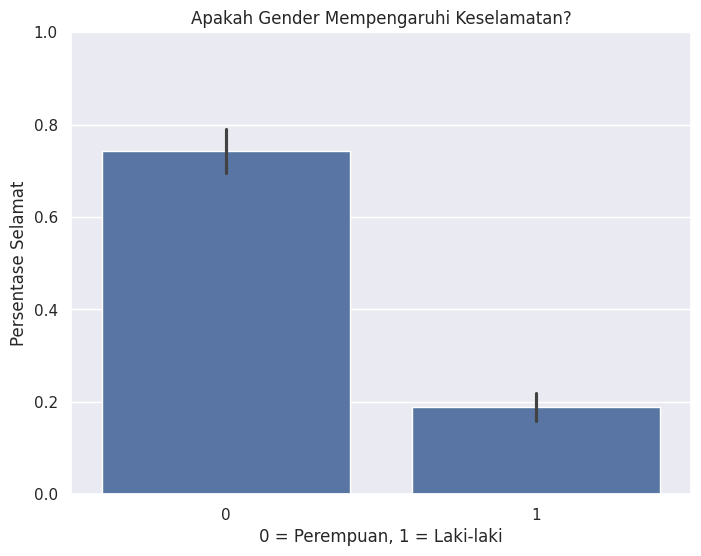

In [18]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Sex_encoded', y='Survived', data=df_titanic)
ax.set_title('Apakah Gender Mempengaruhi Keselamatan?')
ax.set_xlabel('0 = Perempuan, 1 = Laki-laki')
ax.set_ylabel('Persentase Selamat')
plt.ylim(0,1)
plt.show()

## Visualisasi 2: Survival Rate by Class

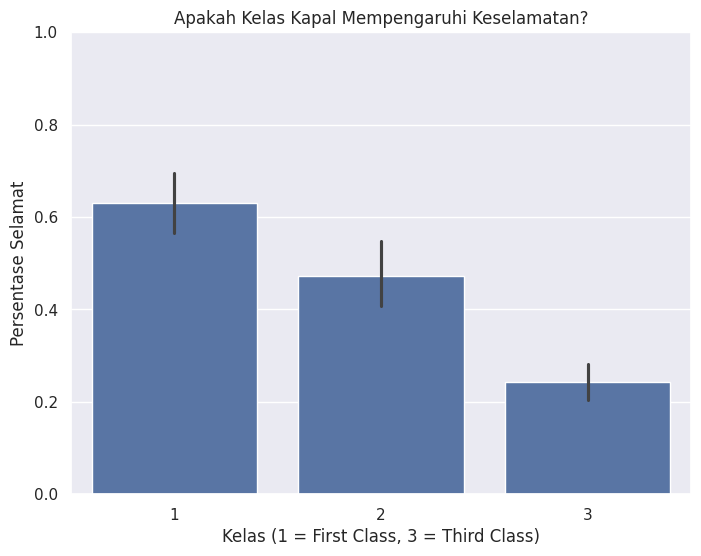

In [19]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Pclass', y='Survived', data=df_titanic, order=sorted(df_titanic['Pclass'].unique()))
ax.set_title('Apakah Kelas Kapal Mempengaruhi Keselamatan?')
ax.set_xlabel('Kelas (1 = First Class, 3 = Third Class)')
ax.set_ylabel('Persentase Selamat')
plt.ylim(0,1)
plt.show()

## Visualisasi 3: Distribusi Usia vs Survival

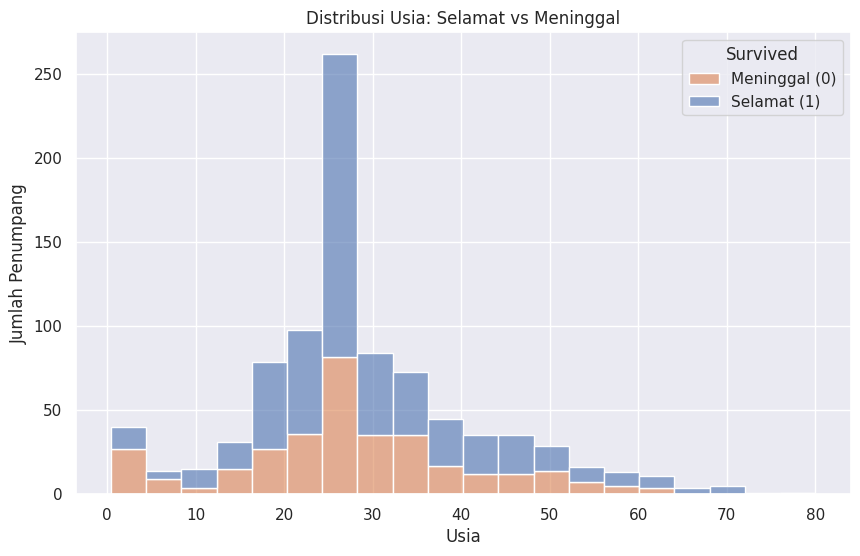

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_titanic, x='Age', hue='Survived', bins=20, alpha=0.6, multiple='stack')
plt.title('Distribusi Usia: Selamat vs Meninggal')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Meninggal (0)','Selamat (1)'])
plt.show()

## Visualisasi 4: Fare vs Survival

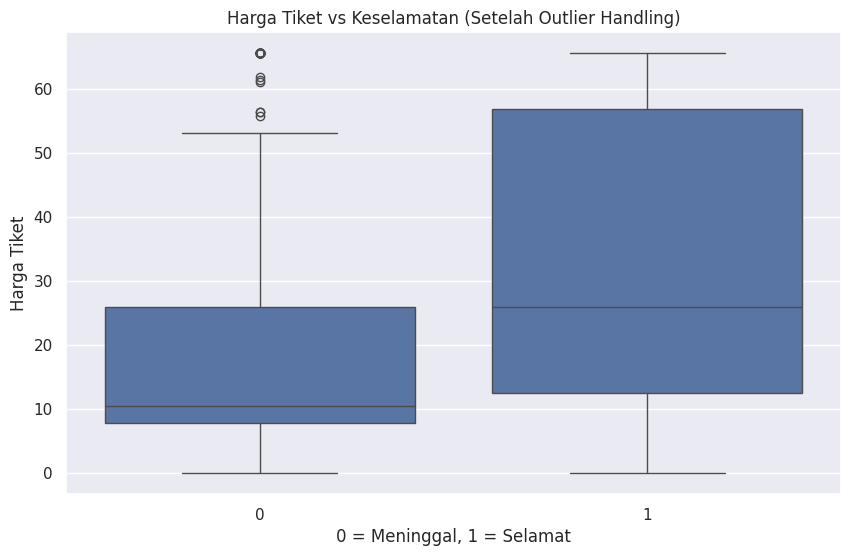

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df_titanic)
plt.title('Harga Tiket vs Keselamatan (Setelah Outlier Handling)')
plt.xlabel('0 = Meninggal, 1 = Selamat')
plt.ylabel('Harga Tiket')
plt.show()

## Visualisasi 5: Heatmap Korelasi

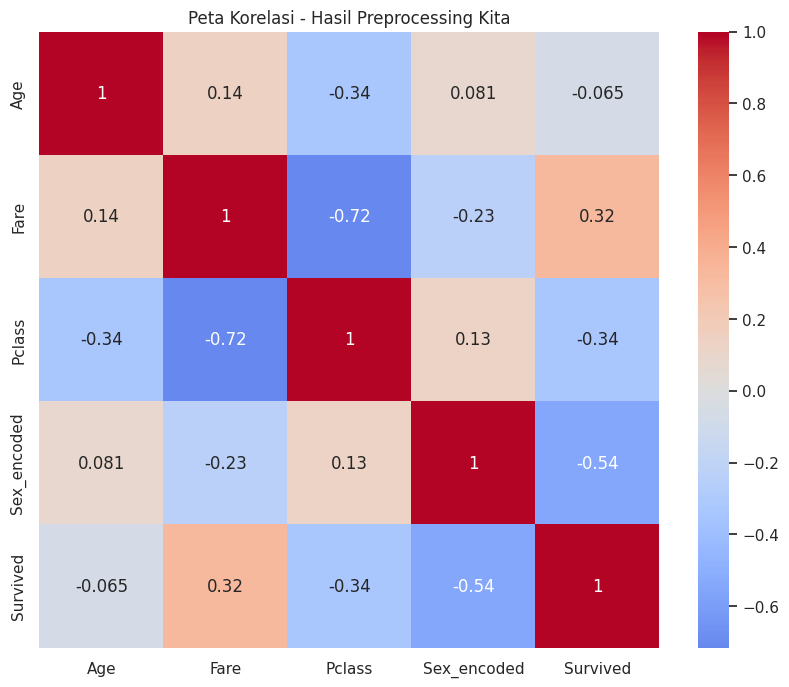

In [22]:
plt.figure(figsize=(10,8))
numeric_cols = ['Age', 'Fare', 'Pclass', 'Sex_encoded', 'Survived']
corr = df_titanic[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Peta Korelasi - Hasil Preprocessing Kita')
plt.show()

## Before vs After Outlier Handling

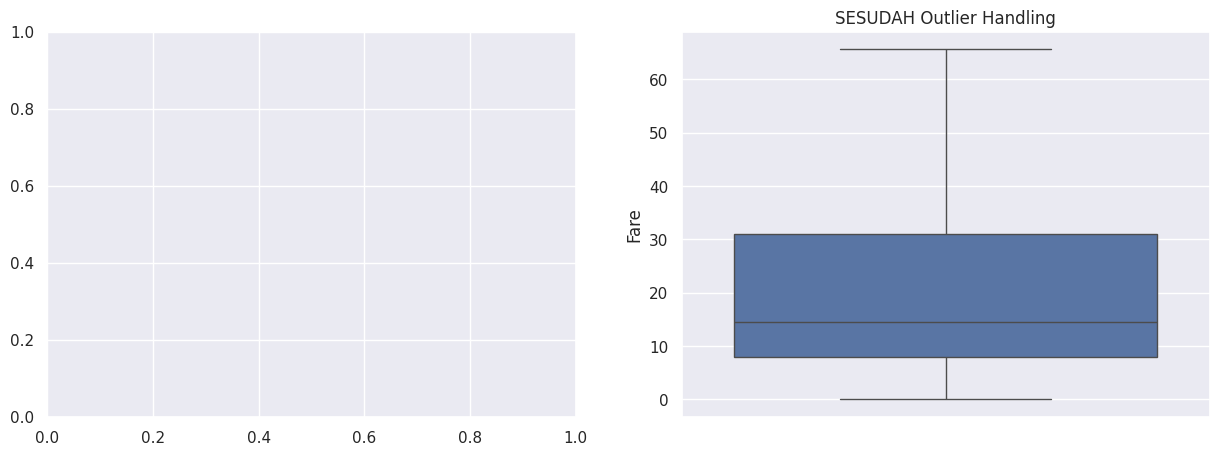

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

# Uncomment jika punya df_original
# sns.boxplot(data=df_original, y='Fare', ax=ax1)
# ax1.set_title('SEBELUM Outlier Handling')

sns.boxplot(data=df_titanic, y='Fare', ax=ax2)
ax2.set_title('SESUDAH Outlier Handling')

plt.show()

## Business Recommendations

In [25]:
print("=== REKOMENDASI BISNIS ===")
female_survival = df_titanic[df_titanic['Sex_encoded'] == 0]['Survived'].mean()
male_survival   = df_titanic[df_titanic['Sex_encoded'] == 1]['Survived'].mean()
print(f"1. Prioritaskan perlindungan perempuan dan anak dalam prosedur emergency (Survival rate: {female_survival:.1%} vs {male_survival:.1%})")

class_survival = df_titanic.groupby('Pclass')['Survived'].mean()
p3 = class_survival.loc[3] if 3 in class_survival.index else class_survival.iloc[-1]
print(f"2. Tinjau ulang prosedur keselamatan di kelas 3 (Survival rate kelas 3: {p3:.1%}). Tingkat layanan dan akses ke alat keselamatan perlu diperbaiki di segmen ini.")

survived_fare = df_titanic[df_titanic['Survived'] == 1]['Fare'].median()
died_fare     = df_titanic[df_titanic['Survived'] == 0]['Fare'].median()
print(f"3. Harga tiket berkorelasi dengan keselamatan — evaluasi alokasi sumber daya keselamatan agar tidak bergantung pada status ekonomi (Median fare selamat: ${survived_fare:.0f} vs meninggal: ${died_fare:.0f}).")

=== REKOMENDASI BISNIS ===
1. Prioritaskan perlindungan perempuan dan anak dalam prosedur emergency (Survival rate: 74.2% vs 18.9%)
2. Tinjau ulang prosedur keselamatan di kelas 3 (Survival rate kelas 3: 24.2%). Tingkat layanan dan akses ke alat keselamatan perlu diperbaiki di segmen ini.
3. Harga tiket berkorelasi dengan keselamatan — evaluasi alokasi sumber daya keselamatan agar tidak bergantung pada status ekonomi (Median fare selamat: $26 vs meninggal: $10).


## Ringkasan Insight & Rekomendasi

In [27]:
print("INSIGHTS PENTING:")
print("1. Perempuan cenderung memiliki tingkat keselamatan lebih tinggi dibanding laki-laki.")
print("2. Penumpang kelas 1 memiliki tingkat keselamatan lebih tinggi dibanding kelas 3.")
print("3. Harga tiket (Fare) berkorelasi positif dengan kemungkinan selamat; usia juga berperan.")

print("\nBUSINESS RECOMMENDATIONS:")
print("1. Prioritaskan perempuan dan anak pada prosedur emergency dan latihan kru.")
print("2. Tingkatkan prosedur & fasilitas keselamatan di kelas ekonomi (kelas 3).")
print("3. Pastikan distribusi peralatan keselamatan tidak bergantung pada kelas/ticket price.")

INSIGHTS PENTING:
1. Perempuan cenderung memiliki tingkat keselamatan lebih tinggi dibanding laki-laki.
2. Penumpang kelas 1 memiliki tingkat keselamatan lebih tinggi dibanding kelas 3.
3. Harga tiket (Fare) berkorelasi positif dengan kemungkinan selamat; usia juga berperan.

BUSINESS RECOMMENDATIONS:
1. Prioritaskan perempuan dan anak pada prosedur emergency dan latihan kru.
2. Tingkatkan prosedur & fasilitas keselamatan di kelas ekonomi (kelas 3).
3. Pastikan distribusi peralatan keselamatan tidak bergantung pada kelas/ticket price.
